## Aufgabe 13 Fisher-Diskriminante: Implementation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
mpl.rcParams['font.size'] = 15

In [3]:
# Daten einlesen
p0 = pd.read_hdf('zwei_populationen.h5', key='P_0_10000')
p1 = pd.read_hdf('zwei_populationen.h5', key='P_1')
p0_1000 = pd.read_hdf('zwei_populationen.h5', key='P_0_1000')

In [4]:
print(p0)
print(p1)
print(p0_1000)

             x         y
0     6.742254  5.954383
1     5.864560  7.585671
2     4.645708  5.103839
3    -1.728421  2.291291
4     0.561347  4.771470
...        ...       ...
9995 -7.863672 -1.315062
9996 -4.918315 -0.149938
9997  2.017233  4.818596
9998 -2.433755  0.742065
9999 -1.632128  2.359670

[10000 rows x 2 columns]
              x         y
0      5.641098  1.191375
1      6.236349  3.954204
2      2.488265  0.273659
3      2.754671  0.290305
4      3.089518  2.027776
...         ...       ...
9995  10.311096  6.751416
9996   6.712547  3.294927
9997   3.918938  2.664149
9998  12.722032  6.446263
9999   7.552637  5.739849

[10000 rows x 2 columns]
            x         y
0   -0.133437  4.075455
1    4.821162  6.286500
2    0.079330  1.700865
3    0.235847  1.891374
4   -5.393498 -2.257974
..        ...       ...
995  0.570826  3.444457
996  2.612701  4.461142
997 -0.649300  2.442175
998  1.764252  5.148051
999 -2.703269  1.790281

[1000 rows x 2 columns]


In [5]:
print(p0.describe())
print(p1.describe())
print(p0_1000.describe())

                  x             y
count  10000.000000  10000.000000
mean      -0.007300      2.963676
std        3.543263      2.615033
min      -13.311864     -6.828857
25%       -2.398417      1.245018
50%        0.000262      2.965853
75%        2.348454      4.699709
max       15.451051     13.777433
                  x             y
count  10000.000000  10000.000000
mean       6.096272      3.174674
std        3.471670      2.308153
min       -5.672639     -5.123931
25%        3.763049      1.634243
50%        6.062341      3.139753
75%        8.488399      4.733547
max       20.355251     11.910529
                 x            y
count  1000.000000  1000.000000
mean     -0.026781     3.015787
std       3.473659     2.579017
min      -9.817560    -5.590628
25%      -2.373706     1.337761
50%       0.069495     2.981503
75%       2.400815     4.815889
max      10.001318    11.843885


### a) Mittelwerte

In [6]:
mu_p0 = p0.mean()
mu_p1 = p1.mean()

In [7]:
print(mu_p0)
print(mu_p1)

x   -0.007300
y    2.963676
dtype: float64
x    6.096272
y    3.174674
dtype: float64


### b) Kovarianzmatrix

In [8]:
V_p0 = p0.cov()
V_p1 = p1.cov()
print(V_p0)
print(V_p1)

           x         y
x  12.554716  8.360258
y   8.360258  6.838396
           x        y
x  12.052492  7.21376
y   7.213760  5.32757


In [9]:
V_p0p1 = V_p0 + V_p1
print(V_p0p1)

           x          y
x  24.607208  15.574018
y  15.574018  12.165966


### c) lineare Fisher-Diskriminante $\vec{\lambda}=\lambda\cdot\vec{e}_\vec{\lambda}$ und Geradengleichung

$\vec{\lambda} = S_W^{-1} \cdot (\vec{\mu}_1-\vec{\mu}_2)$

In [10]:
V_p0p1_inverse = np.linalg.inv(V_p0p1)
print(V_p0p1_inverse)

[[ 0.21411259 -0.27409195]
 [-0.27409195  0.43306984]]


In [11]:
lambda_ = V_p0p1_inverse @ (mu_p0-mu_p1)
print(lambda_)

[-1.24901882  1.58156321]


Geradengleichung: $\vec{x}=x' \cdot \vec{\lambda}$

In [12]:
def gerade(x,lambda_):
    return x*lambda_[0],x*lambda_[1]

#### Plot

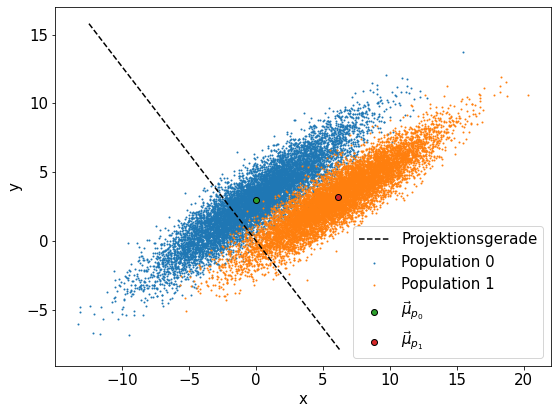

In [13]:
plt.figure(figsize=(8,6))

plt.scatter(p0['x'],p0['y'],s=1,label='Population 0')
plt.scatter(p1['x'],p1['y'],s=1,label='Population 1')
plt.scatter(mu_p0['x'],mu_p0['y'], edgecolor='k',label=r'$\vec{\mu}_{p_0}$')
plt.scatter(mu_p1['x'],mu_p1['y'], edgecolor='k',label=r'$\vec{\mu}_{p_1}$')

projection_linspace = np.linspace(-5,10,100) 
projection_line = gerade(projection_linspace,lambda_)
plt.plot(projection_line[0],projection_line[1],'k--',label='Projektionsgerade')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.tight_layout()
plt.show()

### d) Projektion der Populationen

In [14]:
p0_projected = np.dot(p0,lambda_)
p1_projected = np.dot(p1,lambda_)
print(p0_projected)
print(p1_projected)

[0.9960311  4.67227285 2.26946761 ... 5.10135315 4.21342855 5.77052715]
[-5.1616034  -1.53549425 -2.67508058 ... -0.68130674 -5.69488388
 -0.35545181]


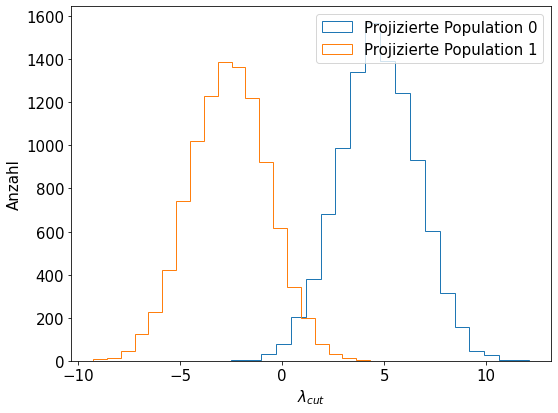

In [37]:
plt.figure(figsize=(8,6))
plt.hist(p0_projected,histtype='step',bins=20,label='Projizierte Population 0')
plt.hist(p1_projected,histtype='step',bins=20,label='Projizierte Population 1')
plt.xlabel(r'$\lambda_{cut}$')
plt.ylabel('Anzahl')
plt.legend()
plt.tight_layout()
plt.show()

### e) Vergleich der verschiedenen $\lambda_{cut}$

In [16]:
lambda_cut_linspace = np.linspace(np.min(p1_projected),np.max(p0_projected),10000)

In [17]:
# p0 ist positiv (Signal), p1 ist negativ (Untergrund)
# true and false, positive and negative
tp = np.array([np.sum(p0_projected > lambda_cut) for lambda_cut in lambda_cut_linspace])
fp = np.array([np.sum(p1_projected > lambda_cut) for lambda_cut in lambda_cut_linspace])
tn = np.array([np.sum(p1_projected <= lambda_cut) for lambda_cut in lambda_cut_linspace])
fn = np.array([np.sum(p0_projected <= lambda_cut) for lambda_cut in lambda_cut_linspace])

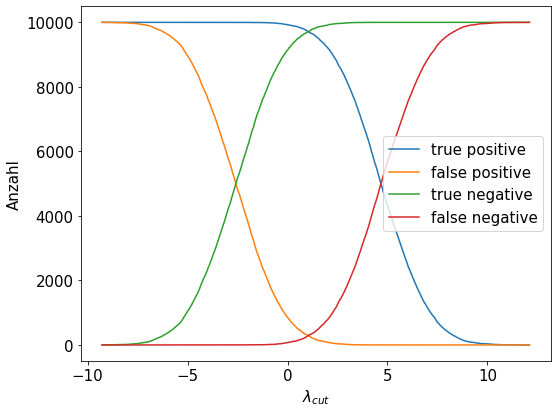

In [18]:
plt.figure(figsize=(8,6))

plt.plot(lambda_cut_linspace, tp, label='true positive')
plt.plot(lambda_cut_linspace, fp, label='false positive')
plt.plot(lambda_cut_linspace, tn, label='true negative')
plt.plot(lambda_cut_linspace, fn, label='false negative')

plt.xlabel(r'$\lambda_{cut}$')
plt.ylabel('Anzahl')

plt.legend()
plt.tight_layout()
plt.show()

<ipython-input-19-f2989a5abbba>:3: RuntimeWarning: invalid value encountered in true_divide
  purity = tp/(tp+fp)


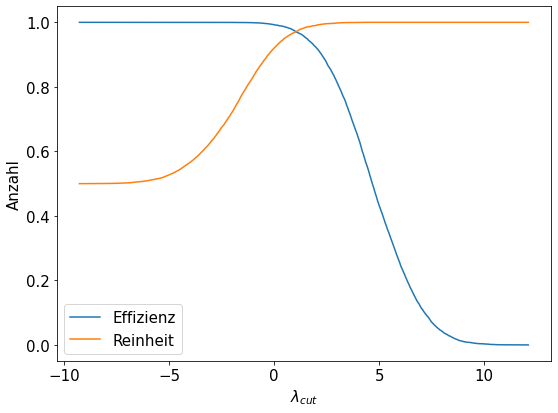

In [19]:
# Plot der Effizienz und Reinheit
efficiency = tp/(tp+fn)
purity = tp/(tp+fp)

plt.figure(figsize=(8,6))

plt.plot(lambda_cut_linspace,efficiency,label='Effizienz')
plt.plot(lambda_cut_linspace,purity,label='Reinheit')

plt.xlabel(r'$\lambda_{cut}$')
plt.ylabel('Anzahl')

plt.legend()
plt.tight_layout()
plt.show()

### f) Bei welchem Wert von $\lambda_{cut}$ wird nach der Trennung das Signal-zu-Untergrundverhältnis $S/B$ maximal?

In [20]:
S = tp
B = fn+fp

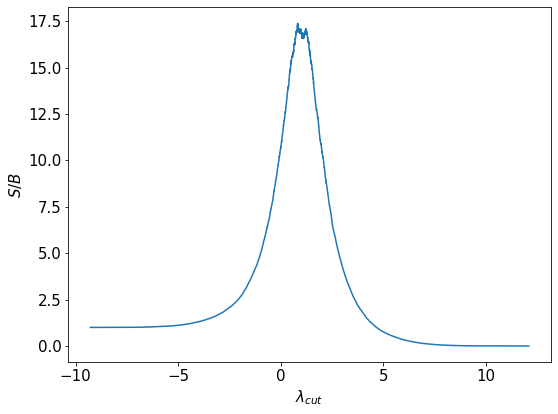

In [21]:
plt.figure(figsize=(8,6))
plt.plot(lambda_cut_linspace,S/B)
plt.xlabel(r'$\lambda_{cut}$')
plt.ylabel(r'$S/B$')
plt.tight_layout()
plt.show()

In [22]:
lambda_cut_max_f = lambda_cut_linspace[np.argmax(S/B)]
print(f'{lambda_cut_max_f = }')

lambda_cut_max_f = 0.8267031799536309


### g) Bei welchem Wert von $\lambda_{cut}$ wird nach der Trennung die Signifikanz $S/\sqrt{S+B}$ maximal?

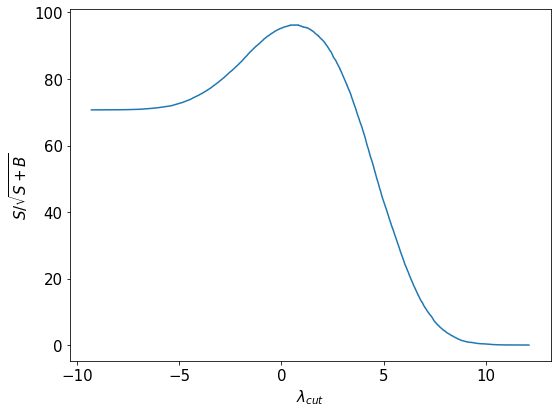

In [23]:
plt.figure(figsize=(8,6))
plt.plot(lambda_cut_linspace,S/np.sqrt(S+B))
plt.xlabel(r'$\lambda_{cut}$')
plt.ylabel(r'$S/\sqrt{S+B}$')
plt.tight_layout()
plt.show()

In [24]:
lambda_cut_max_g = lambda_cut_linspace[np.argmax(S/np.sqrt(S+B))]
print(f'{lambda_cut_max_g = }')

lambda_cut_max_g = 0.7625540472591208


# Und alles nochmal

### h) Wiederhole a) bis g) für $p_{0,1000}$ statt $p_0$

In [25]:
p0_h = p0_1000
mu_p0_h = p0_1000.mean()
V_p0_h = p0_1000.cov()
V_p0p1_h = V_p0_h + V_p1
V_p0p1_inverse_h = np.linalg.inv(V_p0p1_h)
lambda_h = V_p0p1_inverse_h @ (mu_p0_h-mu_p1)

#### Plot

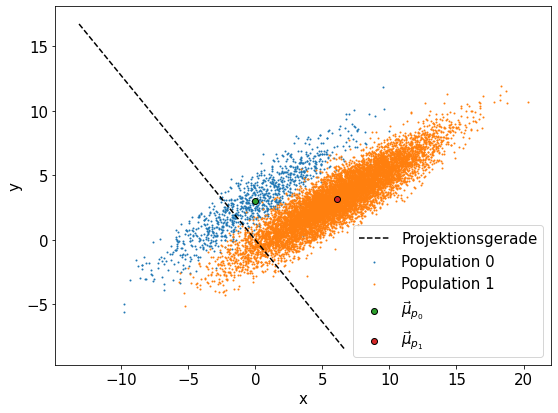

In [26]:
plt.figure(figsize=(8,6))

plt.scatter(p0_h['x'],p0_h['y'],s=1,label='Population 0')
plt.scatter(p1['x'],p1['y'],s=1,label='Population 1')
plt.scatter(mu_p0_h['x'],mu_p0_h['y'], edgecolor='k',label=r'$\vec{\mu}_{p_0}$')
plt.scatter(mu_p1['x'],mu_p1['y'], edgecolor='k',label=r'$\vec{\mu}_{p_1}$')

projection_linspace_h = np.linspace(-5,10,100) 
projection_line_h = gerade(projection_linspace_h,lambda_h)
plt.plot(projection_line_h[0],projection_line_h[1],'k--',label='Projektionsgerade')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.tight_layout()
plt.show()

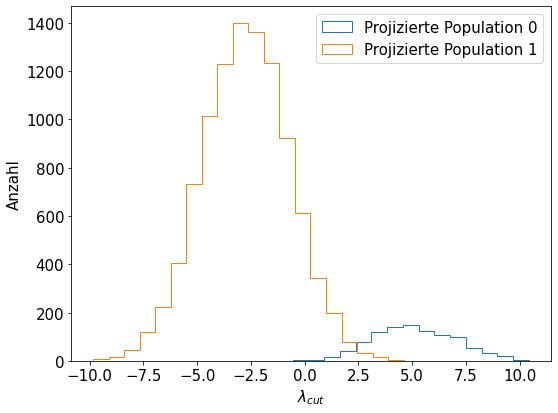

In [36]:
p0_projected_h = np.dot(p0_h,lambda_h)
p1_projected_h = np.dot(p1,lambda_h)
plt.figure(figsize=(8,6))
plt.hist(p0_projected_h,histtype='step',bins=20,label='Projizierte Population 0')
plt.hist(p1_projected_h,histtype='step',bins=20,label='Projizierte Population 1')
plt.xlabel(r'$\lambda_{cut}$')
plt.ylabel('Anzahl')
plt.legend()
plt.tight_layout()
plt.show()

In [28]:
lambda_cut_linspace_h = np.linspace(np.min(p1_projected),np.max(p0_projected_h),10000)

In [29]:
# p0 ist positiv (Signal), p1 ist negativ (Untergrund)
# true and false, positive and negative
tp_h = np.array([np.sum(p0_projected_h > lambda_cut) for lambda_cut in lambda_cut_linspace_h])
fp_h = np.array([np.sum(p1_projected_h > lambda_cut) for lambda_cut in lambda_cut_linspace_h])
tn_h = np.array([np.sum(p1_projected_h <= lambda_cut) for lambda_cut in lambda_cut_linspace_h])
fn_h = np.array([np.sum(p0_projected_h <= lambda_cut) for lambda_cut in lambda_cut_linspace_h])

<ipython-input-30-c8e0ad1e17f7>:3: RuntimeWarning: invalid value encountered in true_divide
  purity_h = tp_h/(tp_h+fp_h)


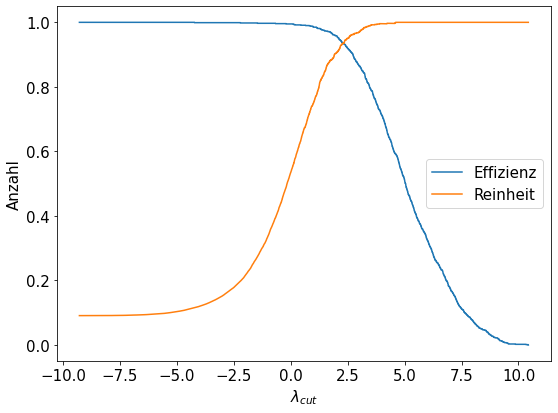

In [30]:
# Plot der Effizienz und Reinheit
efficiency_h = tp_h/(tp_h+fn_h)
purity_h = tp_h/(tp_h+fp_h)

plt.figure(figsize=(8,6))

plt.plot(lambda_cut_linspace_h,efficiency_h,label='Effizienz')
plt.plot(lambda_cut_linspace_h,purity_h,label='Reinheit')

plt.xlabel(r'$\lambda_{cut}$')
plt.ylabel('Anzahl')

plt.legend()
plt.tight_layout()
plt.show()

In [31]:
S_h = tp_h
B_h = fn_h+fp_h

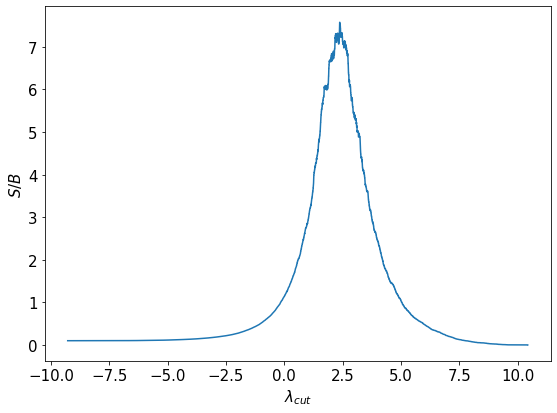

In [32]:
plt.figure(figsize=(8,6))
plt.plot(lambda_cut_linspace_h,S_h/B_h)
plt.xlabel(r'$\lambda_{cut}$')
plt.ylabel(r'$S/B$')
plt.tight_layout()
plt.show()

In [33]:
lambda_cut_max_f_h = lambda_cut_linspace_h[np.argmax(S_h/B_h)]
print(f'{lambda_cut_max_f_h = }')

lambda_cut_max_f_h = 2.3725223944050686


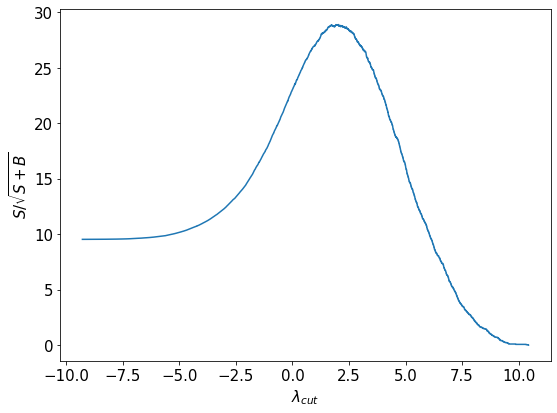

In [34]:
plt.figure(figsize=(8,6))
plt.plot(lambda_cut_linspace_h,S_h/np.sqrt(S_h+B_h))
plt.xlabel(r'$\lambda_{cut}$')
plt.ylabel(r'$S/\sqrt{S+B}$')
plt.tight_layout()
plt.show()

In [35]:
lambda_cut_max_g_h = lambda_cut_linspace_h[np.argmax(S_h/np.sqrt(S_h+B_h))]
print(f'{lambda_cut_max_g_h = }')

lambda_cut_max_g_h = 2.0255419406633166


## Interpretation: 
Mit weniger Werten ist die Steigung der Projektionsgerade flacher geworden.  
Somit haben sich auch die optimalen Werte von $\lambda_{cut}$ verändert.  
Die Höhe des Schnittpunktes von Effizienz und Reinheit hat sich verringert.  
Somit ist zu sehen, dass man bessere Ergebnisse erzielt, wenn man mehr Messwerte des Signals aufnimmt.  